In [1]:
#Load packages
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('emotion_dataset_raw.csv')
# df.columns = ['emotion', 'text']
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [3]:
df.shape

(34792, 2)

In [4]:
#value counts of emotions
df['Emotion'].value_counts()

,count
Emotion,
joy,11045
sadness,6722
fear,5410
anger,4297
surprise,4062
neutral,2254
disgust,856
shame,146


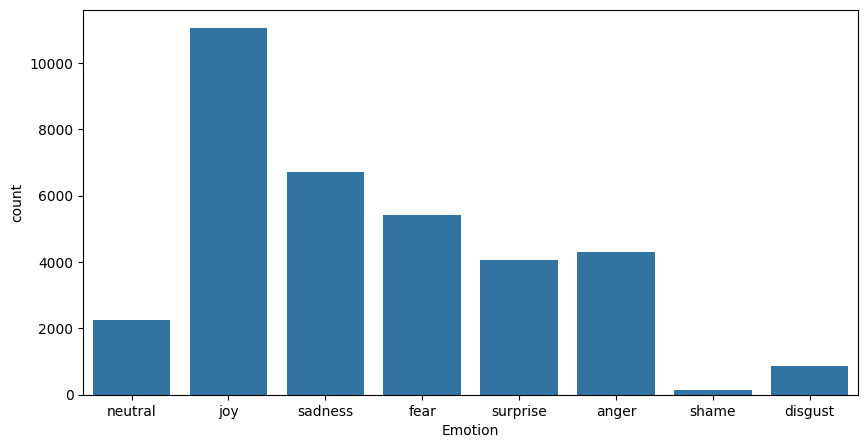

In [5]:
#using seaborn to plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', data=df)
plt.show()

In [6]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer #Import the WordNetLemmatizer
import re
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

# def lemmatization(text):
#     text = text.split()
#     text = [lemmatizer.lemmatize(word) for word in text]
#     return " ".join(text)

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    text = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

def remove_numbers(text):
    text = ''.join([char for char in text if not char.isdigit()])
    return text

def lower_case(text):
    return text.lower()

def remove_punctuations(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

def remove_urls(text):
    return re.sub(r'http\S+|www\.\S+', '', text)

# def remove_small_sentences(text):
#     sentences = text.split('.')
#     filtered_sentences = [sentence for sentence in sentences if len(sentence.split()) >= 3]
#     return '. '.join(filtered_sentences)

# df['clean_text'] = df['text'].apply(lemmatization)
df['clean_text'] = df['Text'].apply(remove_stop_words)
# df['clean_text'] = df['clean_text'].apply(remove_small_sentences)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df['clean_text'] = df['clean_text'].apply(remove_numbers)


In [8]:
df['clean_text'] = df['clean_text'].apply(lower_case)


In [9]:
df['clean_text'] = df['clean_text'].apply(remove_punctuations)
df['clean_text'] = df['clean_text'].apply(remove_urls)

In [10]:
df

,Emotion,Text,clean_text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals re...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,iluvmiasantos ugh babe hugggzzz u babe naamaz...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,michelgw gift hope like it hand made wear itl...
34788,joy,The world didnt give it to me..so the world MO...,world didnt give meso world definitely cnt tak...
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",youu call jealousy call losing you


In [11]:
# Check for null values in the 'clean_text' column
null_values = df['clean_text'].isnull().sum()
print(f"Number of null values in 'clean_text' column: {null_values}")

# Optionally, you can also check for empty strings
empty_strings = (df['clean_text'] == '').sum()
print(f"Number of empty strings in 'clean_text' column: {empty_strings}")


Number of null values in 'clean_text' column: 0
Number of empty strings in 'clean_text' column: 352


In [12]:
# Drop rows where 'clean_text' is null or empty
df = df.dropna(subset=['clean_text'])
df = df[df['clean_text'] != '']
df = df[df['clean_text'].str.strip() != ""] #remove empty strings after removing spaces


In [13]:
empty_strings = (df['clean_text'] == '').sum()
print(f"Number of empty strings in 'clean_text' column: {empty_strings}")

Number of empty strings in 'clean_text' column: 0


In [14]:
df.shape

(34394, 3)

In [15]:
df

,Emotion,Text,clean_text
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals re...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,iluvmiasantos ugh babe hugggzzz u babe naamaz...
5,fear,I'm expecting an extremely important phonecall...,im expecting extremely important phonecall min...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,michelgw gift hope like it hand made wear itl...
34788,joy,The world didnt give it to me..so the world MO...,world didnt give meso world definitely cnt tak...
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",youu call jealousy call losing you


In [16]:
# #Labels encode the target variable
# from sklearn import preprocessing # import the preprocessing module from sklearn
# object = preprocessing.LabelEncoder()
# df['Emotion'] = object.fit_transform(df['Emotion'])

In [17]:
df

,Emotion,Text,clean_text
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals re...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,iluvmiasantos ugh babe hugggzzz u babe naamaz...
5,fear,I'm expecting an extremely important phonecall...,im expecting extremely important phonecall min...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,michelgw gift hope like it hand made wear itl...
34788,joy,The world didnt give it to me..so the world MO...,world didnt give meso world definitely cnt tak...
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",youu call jealousy call losing you


In [18]:
# data after encoding.
df['Emotion'].value_counts()

,count
Emotion,
joy,11039
sadness,6720
fear,5410
anger,4289
surprise,4062
neutral,1872
disgust,856
shame,146


In [19]:
x = df['clean_text']
y = df['Emotion']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6306812675646865

In [23]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.6211842232774494

In [24]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.553251284039151

In [25]:
exp = "i am excited after completing the project"
pipe_lr.predict([exp])

array(['joy'], dtype=object)

In [26]:
import joblib
pipeline_file = open("Emotion_pred.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()